# 1.


Завантажено набір даних "Автомобілі", який містить інформацію про 398 автомобілів із такими характеристиками, як витрата пального, кількість циліндрів, об'єм двигуна, потужність, вага, прискорення, рік випуску та походження
з сайта https://archive.ics.uci.edu/dataset/9/auto+mpg

In [178]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [179]:
# Визначення імен колонок
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

# Завантаження файлу
df = pd.read_csv("secondML/auto-mpg.data-original", sep=r'\s+', names=column_names)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.00,8.00,307.00,130.00,3504.00,12.00,70.00,1.00,chevrolet chevelle malibu
1,15.00,8.00,350.00,165.00,3693.00,11.50,70.00,1.00,buick skylark 320
2,18.00,8.00,318.00,150.00,3436.00,11.00,70.00,1.00,plymouth satellite
3,16.00,8.00,304.00,150.00,3433.00,12.00,70.00,1.00,amc rebel sst
4,17.00,8.00,302.00,140.00,3449.00,10.50,70.00,1.00,ford torino


# 2.

In [180]:
# Виводимо початкову описову статистику
print("Початкова описова статистика даних:")
print(df.describe(include='all'))
print()

# Виводимо кількість пропущених значень у кожному стовпці
print("Кількість пропущених значень (NaN) у кожному стовпці:")
nan_counts = df.isna().sum()
print(nan_counts)
print()

# Виводимо середні значення для числових стовпців
print("Математичні сподівання для числових стовпців:")
print(df[['mpg', 'horsepower']].mean())
print()

df[['mpg', 'horsepower']] = df[['mpg', 'horsepower']].fillna(df[['mpg', 'horsepower']].mean())

# Обчислюємо середнє значення для кожного стовпця без урахування від'ємних значень
mpg_mean = df.loc[df['mpg'] >= 0, 'mpg'].mean()
displacement_mean = df.loc[df['displacement'] >= 0, 'displacement'].mean()

# Замінюємо від'ємні значення на відповідні середні
df.loc[df['mpg'] < 0, 'mpg'] = mpg_mean
df.loc[df['displacement'] < 0, 'displacement'] = displacement_mean

# Виводимо фінальну описову статистику після обробки даних
print("Фінальна описова статистика після обробки даних:")
print(df.describe(include='all'))
print()

# Виводимо фінальну кількість пропущених значень
print("Фінальна кількість пропущених значень у кожному стовпці:")
nan_counts = df.isna().sum()
print(nan_counts)

Початкова описова статистика даних:
          mpg  cylinders  displacement  horsepower  weight  acceleration  \
count  398.00     406.00        406.00      400.00  406.00        406.00   
unique    NaN        NaN           NaN         NaN     NaN           NaN   
top       NaN        NaN           NaN         NaN     NaN           NaN   
freq      NaN        NaN           NaN         NaN     NaN           NaN   
mean    23.44       5.48        193.55      105.08 2979.41         15.52   
std      8.03       1.71        107.18       38.77  847.00          2.80   
min    -14.00       3.00       -250.00       46.00 1613.00          8.00   
25%     17.50       4.00        104.25       75.75 2226.50         13.70   
50%     23.00       4.00        148.50       95.00 2822.50         15.50   
75%     29.00       8.00        302.00      130.00 3618.25         17.18   
max     46.60       8.00        455.00      230.00 5140.00         24.80   

        model_year  origin    car_name  
count     

# 3.

In [181]:
print(f" Mean -- {statistics.mean(df.acceleration)}")
print(f" Median -- {statistics.median(df.weight)}")
print(f" Mode -- {statistics.mode(df.cylinders)}")
print(f" Dispersion -- {statistics.pvariance(df.horsepower)}")
print(f" Average_deviation -- {statistics.pstdev(df.mpg)}")

 Mean -- 15.519704433497537
 Median -- 2822.5
 Mode -- 4.0
 Dispersion -- 1477.104131773399
 Average_deviation -- 7.714405007220421


# 4.

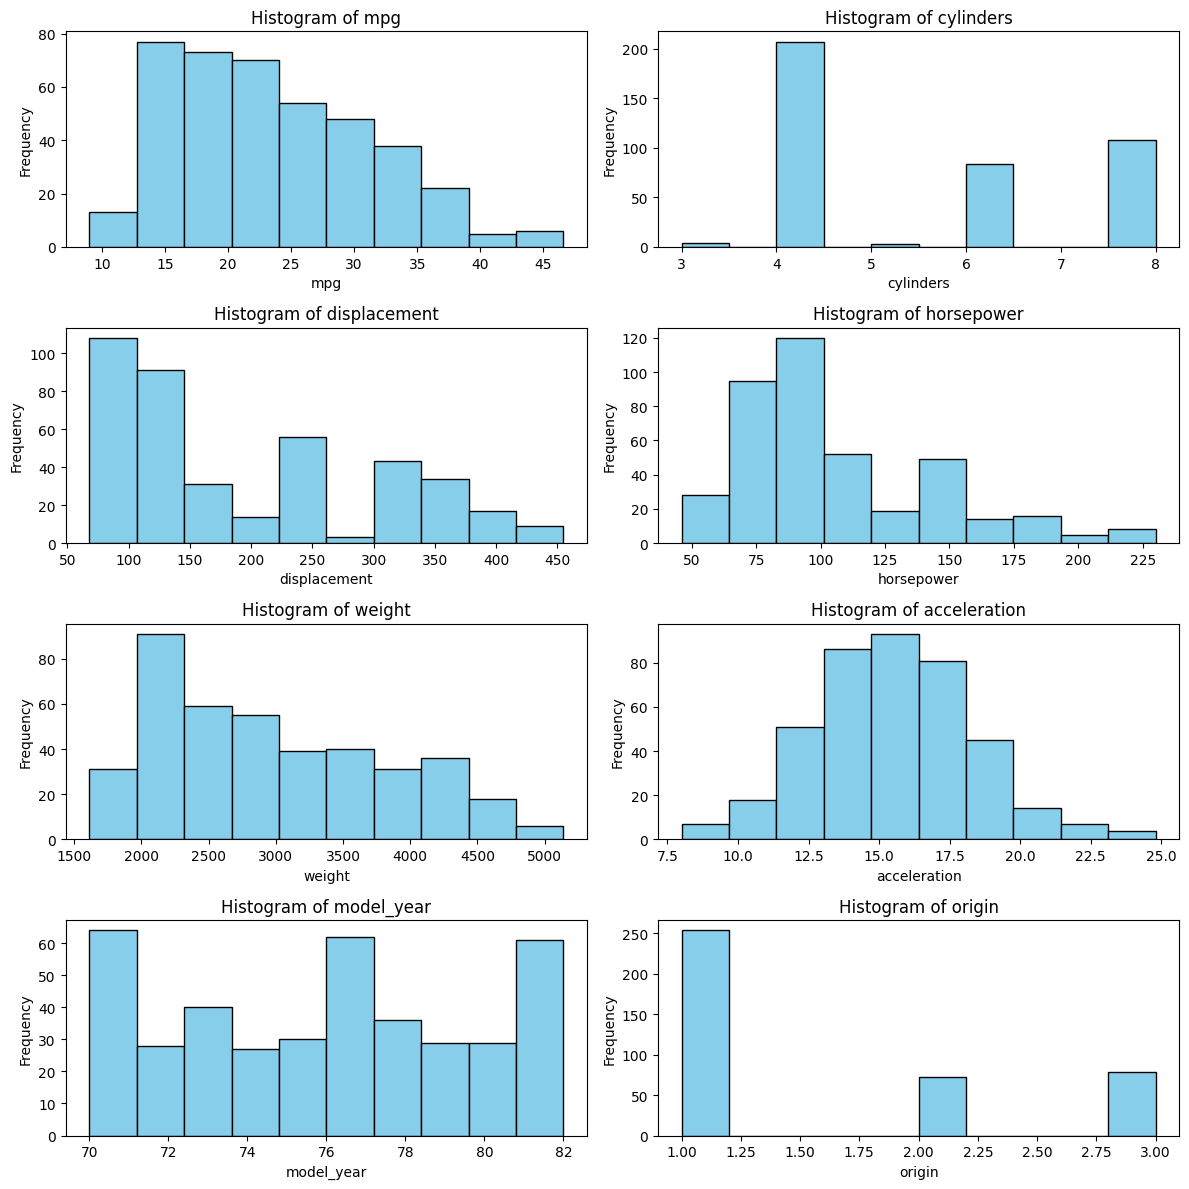

In [182]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# 5.

Для цих даних проробити всі дії з пункту колекції Series і
DataFrame бібліотеки pandas

In [183]:
# Створення Series із колонки 'cylinders'
cylinder = pd.Series(df.cylinders)
print("\nSeries 'cylinder':\n", cylinder)

print("\nСтворення Series з однаковими значеннями:\n", pd.Series(3, range(5)))
print("\nЗначення за індексом 401 у 'cylinder':", cylinder[401])


Series 'cylinder':
 0     8.00
1     8.00
2     8.00
3     8.00
4     8.00
      ... 
401   4.00
402   4.00
403   4.00
404   4.00
405   4.00
Name: cylinders, Length: 406, dtype: float64

Створення Series з однаковими значеннями:
 0    3
1    3
2    3
3    3
4    3
dtype: int64

Значення за індексом 401 у 'cylinder': 4.0


In [184]:
# Описові статистики
print(f"Кількість елементів: {cylinder.count()}")
print(f"Середнє значення: {cylinder.mean()}")
print(f"Мінімальне значення: {cylinder.min()}")
print(f"Максимальне значення: {cylinder.max()}")
print(f"Стандартне відхилення: {cylinder.std()}")
print("\nОписові статистики:\n", cylinder.describe())

Кількість елементів: 406
Середнє значення: 5.475369458128079
Мінімальне значення: 3.0
Максимальне значення: 8.0
Стандартне відхилення: 1.7121596315485297

Описові статистики:
 count   406.00
mean      5.48
std       1.71
min       3.00
25%       4.00
50%       4.00
75%       8.00
max       8.00
Name: cylinders, dtype: float64


In [185]:
# Створення Series із нестандартними індексами
three_cars = pd.Series(df.car_name.iloc[:3].values, index=['First_car', 'Second_car', 'Third_car'])
print("\nSeries 'three_cars':\n", three_cars)

# Створення Series із використання словника
three_cars_horsepower = pd.Series({df.car_name[i]: df.horsepower[i] for i in range(3)})
print("\nSeries 'three_cars_horsepower':\n", three_cars_horsepower)


Series 'three_cars':
 First_car     chevrolet chevelle malibu
Second_car            buick skylark 320
Third_car            plymouth satellite
dtype: object

Series 'three_cars_horsepower':
 chevrolet chevelle malibu   130.00
buick skylark 320           165.00
plymouth satellite          150.00
dtype: float64


In [186]:
print("\nКінські сили для 'buick skylark 320':", three_cars_horsepower['buick skylark 320'])
print("\nТретя машина у 'three_cars':", three_cars.Third_car)

print("\nТип даних 'three_cars_horsepower':", three_cars_horsepower.dtype)
print("\nМасив значень 'three_cars_horsepower':", three_cars_horsepower.values)

# Перевірка наявності 'b' у назвах авто
print("\nЧи містять назви авто букву 'b':\n", three_cars.str.contains('b'))


Кінські сили для 'buick skylark 320': 165.0

Третя машина у 'three_cars': plymouth satellite

Тип даних 'three_cars_horsepower': float64

Масив значень 'three_cars_horsepower': [130. 165. 150.]

Чи містять назви авто букву 'b':
 First_car      True
Second_car     True
Third_car     False
dtype: bool


In [187]:
# Створення нового DataFrame
data = {
    "mpg": [18.0, 15.0, 18.0, 16.0, 17.0],
    "cylinders": [8.0, 8.0, 8.0, 8.0, 8.0],
    "displacement": [307.0, 350.0, 318.0, 304.0, 302.0],
    "horsepower": [130.0, 165.0, 150.0, 150.0, 140.0],
    "weight": [3504.0, 3693.0, 3436.0, 3433.0, 3449.0],
    "acceleration": [12.0, 11.5, 11.0, 12.0, 10.5],
    "model_year": [70.0, 70.0, 70.0, 70.0, 70.0],
    "origin": [1.0, 1.0, 1.0, 1.0, 1.0],
    "car_name": [
        "chevrolet chevelle malibu",
        "buick skylark 320",
        "plymouth satellite",
        "amc rebel sst",
        "ford torino"
    ]
}
df = pd.DataFrame(data)
new_df = pd.DataFrame(df.head())
new_df.index = ['Test1', 'Test2', 'Test3', 'Test4', 'Test5']
print("\nНовий DataFrame з оновленими індексами:\n", new_df)

# Доступ до стовпців та рядків
print("\nСтовпець 'mpg':\n", new_df['mpg'])
print("\nСтовпець 'horsepower':\n", new_df.horsepower)
print("\nРядок 'Test3' (за loc):\n", new_df.loc['Test3'])
print("\nРядок з індексом 1 (за iloc):\n", new_df.iloc[1])

print("\nВибір кількох рядків за loc:\n", new_df.loc['Test3':'Test5'])
print("\nПерші три рядки (за iloc):\n", new_df.iloc[0:3])
print("\nВибір конкретних рядків за loc:\n", new_df.loc[['Test1', 'Test5']])
print("\nВибір конкретних рядків за iloc:\n", new_df.iloc[[2, 4]])

# Вибір конкретних комірок
print("\nВибір колонок 'mpg' та 'horsepower' для перших трьох рядків:\n", new_df.loc['Test1':'Test3', ['mpg', 'horsepower']])
print("\nВибір підмасиву за iloc:\n", new_df.iloc[[0, 3], 1:3])


Новий DataFrame з оновленими індексами:
         mpg  cylinders  displacement  horsepower  weight  acceleration  \
Test1 18.00       8.00        307.00      130.00 3504.00         12.00   
Test2 15.00       8.00        350.00      165.00 3693.00         11.50   
Test3 18.00       8.00        318.00      150.00 3436.00         11.00   
Test4 16.00       8.00        304.00      150.00 3433.00         12.00   
Test5 17.00       8.00        302.00      140.00 3449.00         10.50   

       model_year  origin                   car_name  
Test1       70.00    1.00  chevrolet chevelle malibu  
Test2       70.00    1.00          buick skylark 320  
Test3       70.00    1.00         plymouth satellite  
Test4       70.00    1.00              amc rebel sst  
Test5       70.00    1.00                ford torino  

Стовпець 'mpg':
 Test1   18.00
Test2   15.00
Test3   18.00
Test4   16.00
Test5   17.00
Name: mpg, dtype: float64

Стовпець 'horsepower':
 Test1   130.00
Test2   165.00
Test3   150.00

In [188]:
# Фільтрація
print("Чи більше за 140 значення 'horsepower':\n", new_df['horsepower'] > 140)

new_df_ = new_df.copy()
new_df_.drop('car_name', axis=1, inplace=True)
print("Значення 'horsepower' більше 140 або NaN:\n", new_df_[new_df_ > 150])

Чи більше за 140 значення 'horsepower':
 Test1    False
Test2     True
Test3     True
Test4     True
Test5    False
Name: horsepower, dtype: bool
Значення 'horsepower' більше 140 або NaN:
        mpg  cylinders  displacement  horsepower  weight  acceleration  \
Test1  NaN        NaN        307.00         NaN 3504.00           NaN   
Test2  NaN        NaN        350.00      165.00 3693.00           NaN   
Test3  NaN        NaN        318.00         NaN 3436.00           NaN   
Test4  NaN        NaN        304.00         NaN 3433.00           NaN   
Test5  NaN        NaN        302.00         NaN 3449.00           NaN   

       model_year  origin  
Test1         NaN     NaN  
Test2         NaN     NaN  
Test3         NaN     NaN  
Test4         NaN     NaN  
Test5         NaN     NaN  


In [189]:
# Доступ та зміна значень
print("Значення 'mpg' у 'Test1' (до зміни):", new_df.at['Test1', 'mpg'])
new_df.at['Test1', 'mpg'] = 50
print("Значення 'mpg' у 'Test1' (після зміни):", new_df.at['Test1', 'mpg'])

new_df.iat[0, 0] = 120
print("\nЗначення у комірці (0,0) (після зміни):", new_df.iat[0, 0])

Значення 'mpg' у 'Test1' (до зміни): 18.0
Значення 'mpg' у 'Test1' (після зміни): 50.0

Значення у комірці (0,0) (після зміни): 120.0


In [190]:
# Загальні описові статистики
print("\nОписові статистики DataFrame:\n", df.describe())

# Форматування виведення
pd.set_option('display.float_format', '{:.1f}'.format)
print("\nОписові статистики DataFrame (із форматуванням):\n", df.describe())


Описові статистики DataFrame:
          mpg  cylinders  displacement  horsepower  weight  acceleration  \
count   5.00       5.00          5.00        5.00    5.00          5.00   
mean   37.20       8.00        316.20      147.00 3503.00         11.40   
std    46.30       0.00         19.88       13.04  110.01          0.65   
min    15.00       8.00        302.00      130.00 3433.00         10.50   
25%    16.00       8.00        304.00      140.00 3436.00         11.00   
50%    17.00       8.00        307.00      150.00 3449.00         11.50   
75%    18.00       8.00        318.00      150.00 3504.00         12.00   
max   120.00       8.00        350.00      165.00 3693.00         12.00   

       model_year  origin  
count        5.00    5.00  
mean        70.00    1.00  
std          0.00    0.00  
min         70.00    1.00  
25%         70.00    1.00  
50%         70.00    1.00  
75%         70.00    1.00  
max         70.00    1.00  

Описові статистики DataFrame (із формат

In [191]:
# Транспонування 
print("\nТранспонований DataFrame:\n", df.T.head())
print("\nОписові статистики транспонованого DataFrame:\n", df.T.describe())


Транспонований DataFrame:
                   0      1      2      3      4
mpg           120.0   15.0   18.0   16.0   17.0
cylinders       8.0    8.0    8.0    8.0    8.0
displacement  307.0  350.0  318.0  304.0  302.0
horsepower    130.0  165.0  150.0  150.0  140.0
weight       3504.0 3693.0 3436.0 3433.0 3449.0

Описові статистики транспонованого DataFrame:
            0    1    2    3    4
count    9.0  9.0  9.0  9.0  9.0
unique   9.0  9.0  9.0  9.0  9.0
top    120.0 15.0 18.0 16.0 17.0
freq     1.0  1.0  1.0  1.0  1.0


In [192]:
# Сортування
print("\nСортування за індексом (зворотній порядок):\n", df.sort_index(ascending=False).head())
print("\nСортування за назвою колонок:\n", df.sort_index(axis=1).head())
print("\nСортування транспонованого'new_df' за 'mpg' (спадний порядок):\n", new_df.T.sort_values(by='mpg', axis=1,ascending=False))


Сортування за індексом (зворотній порядок):
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
4  17.0        8.0         302.0       140.0  3449.0          10.5   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
0 120.0        8.0         307.0       130.0  3504.0          12.0   

   model_year  origin                   car_name  
4        70.0     1.0                ford torino  
3        70.0     1.0              amc rebel sst  
2        70.0     1.0         plymouth satellite  
1        70.0     1.0          buick skylark 320  
0        70.0     1.0  chevrolet chevelle malibu  

Сортування за назвою колонок:
    acceleration                   car_name  cylinders  displacement  \
0          12.0  chevrolet chevelle malibu        8.0         307.0   
1          11.5          buick skylark 320        8.0

# 6.

Перші 5 рядків датасету:
                          rownames survived     sex  age passengerClass
0    Allen, Miss. Elisabeth Walton      yes  female 29.0            1st
1   Allison, Master. Hudson Trevor      yes    male  0.9            1st
2     Allison, Miss. Helen Loraine       no  female  2.0            1st
3  Allison, Mr. Hudson Joshua Crei       no    male 30.0            1st
4  Allison, Mrs. Hudson J C (Bessi       no  female 25.0            1st 

Останні 5 рядків датасету:
                       rownames survived     sex  age passengerClass
1304       Zabour, Miss. Hileni       no  female 14.5            3rd
1305      Zabour, Miss. Thamine       no  female  NaN            3rd
1306  Zakarian, Mr. Mapriededer       no    male 26.5            3rd
1307        Zakarian, Mr. Ortin       no    male 27.0            3rd
1308         Zimmerman, Mr. Leo       no    male 29.0            3rd 

Перші 5 рядків датасету:
                              name survived     sex  age class
0    Allen

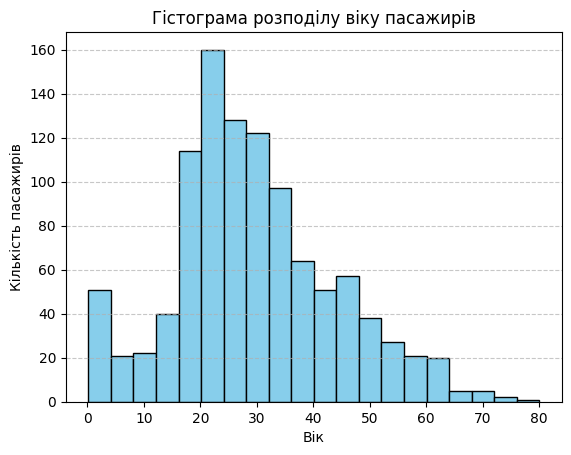

In [193]:
# Завантаження даних
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

# Виведення перших та останніх рядків
print("Перші 5 рядків датасету:")
print(titanic.head(), '\n')
print("Останні 5 рядків датасету:")
print(titanic.tail(), '\n')

# Зміна назв стовпців
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

# Виведення перших  рядків
print("Перші 5 рядків датасету:")
print(titanic.head(), '\n')

# Наймолодший та найстарший пасажир
youngest_passenger = titanic[titanic['age'] == titanic.age.min()]
oldest_passenger = titanic[titanic['age'] == titanic.age.max()]

print("Наймолодший пасажир:")
print(youngest_passenger, '\n')
print("Найстаріший пасажир:")
print(oldest_passenger, '\n')

# Середній вік пасажирів
mean_age = titanic['age'].mean()
print(f"Середній вік пасажирів: {mean_age:.2f}\n")

# Аналіз виживших пасажирів
df_survived = titanic[titanic['survived'] == 'yes']
total_survived = len(df_survived)
print(f"Загальна кількість виживших: {total_survived}\n")

sex_distribution = df_survived['sex'].value_counts()
print("Розподіл виживших за статтю:")
print(sex_distribution, '\n')

class_distribution = titanic['class'].value_counts()
print("Розподіл виживших за класами:")
print(class_distribution, '\n')

# Аналіз жінок 1-го класу
sorted_women_first_class = titanic[(titanic['sex'] == 'female') & (titanic['class'] == '1st')].sort_values(by='age')
youngest_woman_first_class = sorted_women_first_class.dropna(subset=['age']).iloc[0]
oldest_woman_first_class = sorted_women_first_class.dropna(subset=['age']).iloc[-1]
survived_women_first_class = len(sorted_women_first_class[sorted_women_first_class['survived'] == 'yes'])

print("Наймолодша жінка 1 класу:")
print(youngest_woman_first_class, '\n')
print("Найстаріша жінка 1 класу:")
print(oldest_woman_first_class, '\n')
print(f"Кількість виживших жінок 1 класу: {survived_women_first_class}\n")

# Побудова гістограми вікових груп пасажирів
plt.hist(titanic['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.title('Гістограма розподілу віку пасажирів')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
